In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import odeint,LSODA,BDF,solve_ivp
from scipy.linalg import eig
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo

import ModelFramework as mf
import ModelFramework.Elements as ele
import ModelFramework.ExternalForces as ef
import FwtModels.RectWing as rw
import FwtModels.RectWing.Models as rwm
import multiprocessing as mp

me.mechanics_printing()

In [2]:
def Find_Fixed_Points_JEC(b_modes,t_modes,model_num,save_mini_model=False):
    dataset_name = 'JEC'
    p = rw.base_params(b_modes + t_modes + 2)
    p.rho.value = 1.225
    p.s_t.value = 12
    p.c.value = 1.8
    p.EI.value = 9.77e6
    p.GJ.value = 0.99e6
    p.rho_t.value = 19.53
    p.e_0.value = 0.08
    p.e_1.value = 0  
    p.ratio_fwt.value = 0.2

    p.alpha_s.value = np.deg2rad(15)
    p.eta.value = [1]*p.qs
    p.m_ac.value = 1e6
    p.k_ac.value = 1e6
    p.k_fwt.value = 0    

    vars_ls =[]
    vars_ls.append((p.V,[50]))
    vars_ls.append((p.alpha_r,np.deg2rad([4])))
    vars_ls.append((p.m_factor,[1]))
    vars_ls.append((p.c_dmax,[1]))
    vars_ls.append((p.k_fwt,[0,1e7]))
    vars_ls.append((p.tau_1,[5,0,-5]))
    vars_ls.append((p.Lambda,np.deg2rad([17.5])))
    variables = [k for k,v in vars_ls]

    #Get The Model
    print(f'M{model_num}-{dataset_name}: Started')
    sm = mf.SymbolicModel.from_file(f'{b_modes}B{t_modes}T-M{model_num}.py')
    
    #L = me.msubs((sm_mini.ExtForces.Q()[0]),{i:0 for i in p.qd})
    #L_func = sym.lambdify((p.q,variables),L)

    fp_df = rw.fixed_point_finder(p,sm,vars_ls,False)
    if save_mini_model:
        sm_mini = sm.msubs(p.GetSubs(0,None,ignore=variables+[p.w_g]))
        sm_mini.to_file(f'Temp_{dataset_name}_mini_M{model_num}_{b_modes}B{t_modes}T.py')
    fp_df['Model'] = model_num
    fp_df['Config'] = dataset_name
    return fp_df    

In [3]:
def Find_Fixed_Points_WT(b_modes,t_modes,model_num,save_mini_model=False):
    dataset_name = 'WT'
    p = rw.base_params(b_modes + t_modes + 2)
    p.rho.value = 1.225
    p.s_t.value = 1.345
    p.c.value = 0.15
    p.EI.value = 61
    p.GJ.value = 200
    p.rho_t.value = 10
    p.e_0.value = 0
    p.e_1.value = 0
    p.ratio_fwt.value = 0.2
    p.alpha_s.value = np.deg2rad(15)
    p.eta.value = [1]*p.qs
    p.m_ac.value = 1e6
    p.k_ac.value = 1e6  

    vars_ls =[]
    vars_ls.append((p.V,[20]))
    vars_ls.append((p.alpha_r,np.deg2rad([4])))
    vars_ls.append((p.m_factor,[1]))
    vars_ls.append((p.c_dmax,[1]))
    vars_ls.append((p.k_fwt,[0,1e5]))
    vars_ls.append((p.Lambda,np.deg2rad([17.5])))
    variables = [k for k,v in vars_ls]

    #Get The Model
    print(f'M{model_num}-{dataset_name}: Started')
    sm = mf.SymbolicModel.from_file(f'{b_modes}B{t_modes}T-M{model_num}.py')
    #L = me.msubs((sm_mini.ExtForces.Q()[0]),{i:0 for i in p.qd})
    #L_func = sym.lambdify((p.q,variables),L)

    fp_df = rw.fixed_point_finder(p,sm,vars_ls,False)
    if save_mini_model:
        sm_mini = sm.msubs(p.GetSubs(0,None,ignore=variables+[p.w_g]))
        sm_mini.to_file(f'Temp_{dataset_name}_mini_M{model_num}_{b_modes}B{t_modes}T.py')
    fp_df['Model'] = model_num
    fp_df['Config'] = dataset_name
    return fp_df   

In [4]:
def Find_Fixed_Points_HALE(b_modes,t_modes,model_num,save_mini_model=False):
    dataset_name = 'HALE'
    p = rw.base_params(b_modes + t_modes + 2)
    p.rho.value = 0.0889
    p.s_t.value = 16
    p.c.value = 1
    p.EI.value = 2e4
    p.GJ.value = 1e4
    p.rho_t.value = 0.75
    p.e_0.value = 0.25
    p.e_1.value = 0
    
    p.ratio_fwt.value = 0.2
    p.alpha_s.value = np.deg2rad(15)
    p.eta.value = [1]*p.qs
    p.m_ac.value = 1e6
    p.k_ac.value = 1e6  

    vars_ls =[]
    vars_ls.append((p.V,[25]))
    vars_ls.append((p.alpha_r,np.deg2rad([4])))
    vars_ls.append((p.m_factor,[1]))
    vars_ls.append((p.c_dmax,[1]))
    vars_ls.append((p.k_fwt,[0,1e6]))
    vars_ls.append((p.Lambda,np.deg2rad([17.5])))
    variables = [k for k,v in vars_ls]

    #Get The Model
    print(f'M{model_num}-{dataset_name}: Started')
    sm = mf.SymbolicModel.from_file(f'{b_modes}B{t_modes}T-M{model_num}.py')
    #L = me.msubs((sm_mini.ExtForces.Q()[0]),{i:0 for i in p.qd})
    #L_func = sym.lambdify((p.q,variables),L)

    fp_df = rw.fixed_point_finder(p,sm,vars_ls,False)
    if save_mini_model:      
        sm_mini = sm.msubs(p.GetSubs(0,None,ignore=variables+[p.w_g]))
        sm_mini.to_file(f'Temp_{dataset_name}_mini_M{model_num}_{b_modes}B{t_modes}T.py')
    fp_df['Model'] = model_num
    fp_df['Config'] = dataset_name
    return fp_df   

In [5]:
pool = mp.Pool(mp.cpu_count())

res =[]
for i in [6]:
    res.append(pool.apply_async(Find_Fixed_Points_JEC, args = (3,3,i,True)))
    #res.append(pool.apply_async(Find_Fixed_Points_WT, args = (3,3,i,True)))
    #res.append(pool.apply_async(Find_Fixed_Points_HALE, args = (3,3,i,True)))

pool.close()
pool.join()


ls = []
for i in res:
    ls += i.get().to_dict('records')
df = pd.DataFrame(ls)
print('Complete')

df['Coast Angle [Deg]'] = (np.rad2deg([i[-1] for i in df['q']]))
df.head()

M6-JEC: Started
Complete


,V,alpha_r,delta_m,c_dmax,k_fwt,tau_1,Lambda,q,Model,Config,Coast Angle [Deg]
0,50.0,0.069813,1.0,1.0,0.0,5.0,0.305433,"[0.022658042769777557, 0.004215140796771736, -...",6,JEC,-418.903464
1,50.0,0.069813,1.0,1.0,10000000.0,5.0,0.305433,"[0.0425869659573218, 0.020657237320751663, -0....",6,JEC,-12.065624
2,50.0,0.069813,1.0,1.0,0.0,0.0,0.305433,"[0.01023092048017388, 0.0027279985314835435, -...",6,JEC,-3.844319
3,50.0,0.069813,1.0,1.0,10000000.0,0.0,0.305433,"[0.010521746264448352, 0.0028831945349942056, ...",6,JEC,-1.138359
4,50.0,0.069813,1.0,1.0,0.0,-5.0,0.305433,"[0.010500107292465194, 0.0035178130647300207, ...",6,JEC,93.722830


In [6]:
def GustTimeResponse(b_modes,t_modes,model_file,gust_strength,gust_period,fp_dict,att_index,end_time):
    print(f'Model {model_file},Attitude {att_index},Strength {gust_strength}, Period {gust_period} - Starting')
    p = rw.JEC_params(b_modes+t_modes+2)      
    sm = mf.SymbolicModel.from_file(model_file)   
    nm = sm.CreateNumericModel(p)
    
    # set attitude parameters
    tup = p.GetTuple()
    for k,v in fp_dict.items():
        for s in tup:
            if isinstance(s,mf.ModelSymbol):
                if s.name == k:
                    s.value = v

    #Define the Gust Function
    def gust(t,x):
        if t<gust_period:
            return gust_strength*0.5*(1- np.cos(2*np.pi*t/gust_period))
        else:
            return 0
    p.w_g.value = gust
    
    # Define Objective Function for solver
    def objectiveDeriv(t,y):
        tup = p.GetNumericTuple(y,t)
        return nm.deriv(t,y,tup)

    # Generate I.C. and run the solver
    x = [0]*p.qs*2
    x[::2] = fp_dict['q']
    yData = solve_ivp(objectiveDeriv,(0,end_time),x)

    #interpolate to reduce t and y points
    int_func = interp1d(yData.t,yData.y)

    t = np.linspace(0,end_time,(end_time*100)+1)
    yi = int_func(t)
    
    
    #Package Results
    # remove q from dict
    var = {k:v for k,v in fp_dict.items() if k !='q'}
    
    #generate functions for values of interest
    z,_ = mf.ShapeFunctions_BN_TM(b_modes,0,p.q[1:b_modes+1],p.y_0,0,0,0,p.eta[1:b_modes+1])

    d2z_dy2 = z.diff(p.y_0,p.y_0).subs(p.y_0,0)
    z_tip = z.subs(p.y_0,p.s_0)
    dz_dy_tip = z.diff(p.y_0).subs(p.y_0,p.s_0)

    d2z_dy2_f = sym.lambdify((p.GetTuple(),p.q),d2z_dy2)
    z_tip_f = sym.lambdify((p.GetTuple(),p.q),z_tip)
    dz_dy_tip_f = sym.lambdify((p.GetTuple(),p.q),dz_dy_tip)

    tup = p.GetNumericTuple(None,0)
    wrbm = d2z_dy2_f(tup,yi[::2])*p.EI.value
    wrbm_max = max(wrbm)-wrbm[0]
    wrbm_min = min(wrbm)-wrbm[0]
    inner_tip_deflection = z_tip_f(tup,yi[::2])
    fold_angle = np.rad2deg((yi[-2])+dz_dy_tip_f(tup,yi[::2]))
        
    ls = []
    for i in range(len(t)):
        lift = nm.ExtForces(p.GetNumericTuple(yi[:,i],t[i]),yi[:,i],t[i])[0,0]

        ls.append({'t':t[i],'q':yi[:,i],'Gust Strength':gust_strength,
                   'Gust Period':gust_period,**var,'Attitude':att_index,
                   'Delta WRBM':wrbm[i]-wrbm[0],
                   'WRBM Max':wrbm_max,'WRBM Min':wrbm_min,
                   'WRBM':wrbm[i],'Inner Tip Deflection':inner_tip_deflection[i],
                  'Fold Angle':fold_angle[i],'Lift':lift})
    return ls

In [7]:
%%time
i=0
row = df.iloc[i]
config = row['Config']
Model = row['Model']
ls = GustTimeResponse(3,3,f'Temp_{config}_mini_M{Model}_{3}B{3}T.py',1,1,row.to_dict(),i,4)

Model Temp_JEC_mini_M6_3B3T.py,Attitude 0,Strength 1, Period 1 - Starting
CPU times: user 5.23 s, sys: 32.7 ms, total: 5.27 s
Wall time: 5.26 s


In [8]:
data = df.copy()
#data = data[data['Model']==0]
data = data[data['Config']=='JEC']
w_max = [0.1]
w_T = [0.2,1,2]
w_T = np.linspace(0.2,3,15)
w_T = [0.2,0.4,0.8,1.5,2,3]
b_modes = 3
t_modes = 3

#sm = mf.SymbolicModel.from_file(f'{b_modes}B{t_modes}T-M{model_num}.py')
#sm_mini = sm.msubs(p.GetSubs(0,p.fp,ignore=variables+[p.w_g]))
#sm_mini.to_file('Temp_Model.py')

pool = mp.Pool(mp.cpu_count())

res =[]
for T in w_T:
    for M in w_max:
        for i in range(len(data)):
            row = data.iloc[i]
            config = row['Config']
            Model = row['Model']
            res.append(pool.apply_async(GustTimeResponse, args = (3,3,f'Temp_{config}_mini_M{Model}_{b_modes}B{t_modes}T.py',M,T,row.to_dict(),i,4)))

pool.close()
pool.join()


ls = []
for i in res:
    ls += i.get()
gust_df = pd.DataFrame(ls)
print('Complete')

Model Temp_JEC_mini_M6_3B3T.py,Attitude 0,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 1,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 3,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 4,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 2,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 5,Strength 0.1, Period 0.2 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 0,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 1,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 2,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 3,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 4,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 5,Strength 0.1, Period 0.4 - Starting
Model Temp_JEC_mini_M6_3B3T.py,Attitude 0,Strength 0.1, Period 0

In [9]:
gust_df.to_pickle('WT_GustResponseData_twist.pkl')

In [16]:
data = gust_df.copy()
#data = data[data['Gust Strength']==1]
data['Locked'] = data['k_fwt']>0
data['Fold Angle']

0       -416.026890
1       -417.127810
2       -419.734298
3       -423.222472
4       -427.536271
            ...    
14431      0.134592
14432      0.134589
14433      0.134601
14434      0.134621
14435      0.134644
Name: Fold Angle, Length: 14436, dtype: float64

In [15]:
gust_df.head()

,t,q,Gust Strength,Gust Period,V,alpha_r,delta_m,c_dmax,k_fwt,tau_1,...,Config,Coast Angle [Deg],Attitude,Delta WRBM,WRBM Max,WRBM Min,WRBM,Inner Tip Deflection,Fold Angle,Lift
0,0.00,"[0.022658042769777557, 0.0, 0.0042151407967717...",0.1,0.2,50.0,0.069813,1.0,1.0,0.0,5.0,...,JEC,-418.903464,0,0.000000,565593.905625,-748213.998753,82363.851169,0.279443,-416.026890,26767.289388
1,0.01,"[0.022657255375290637, -0.00017245197840025963...",0.1,0.2,50.0,0.069813,1.0,1.0,0.0,5.0,...,JEC,-418.903464,0,12227.687320,565593.905625,-748213.998753,94591.538489,0.274206,-417.127810,25251.712514
2,0.02,"[0.022655336388814683, -0.00025407487532916605...",0.1,0.2,50.0,0.069813,1.0,1.0,0.0,5.0,...,JEC,-418.903464,0,30309.743711,565593.905625,-748213.998753,112673.594880,0.265767,-419.734298,25547.844338
3,0.03,"[0.022652988118039667, -0.00024681400057470493...",0.1,0.2,50.0,0.069813,1.0,1.0,0.0,5.0,...,JEC,-418.903464,0,28980.351895,565593.905625,-748213.998753,111344.203064,0.261698,-423.222472,25405.838849
4,0.04,"[0.022650684512702964, -0.0002303288373584501,...",0.1,0.2,50.0,0.069813,1.0,1.0,0.0,5.0,...,JEC,-418.903464,0,9392.885406,565593.905625,-748213.998753,91756.736574,0.262890,-427.536271,23418.084948


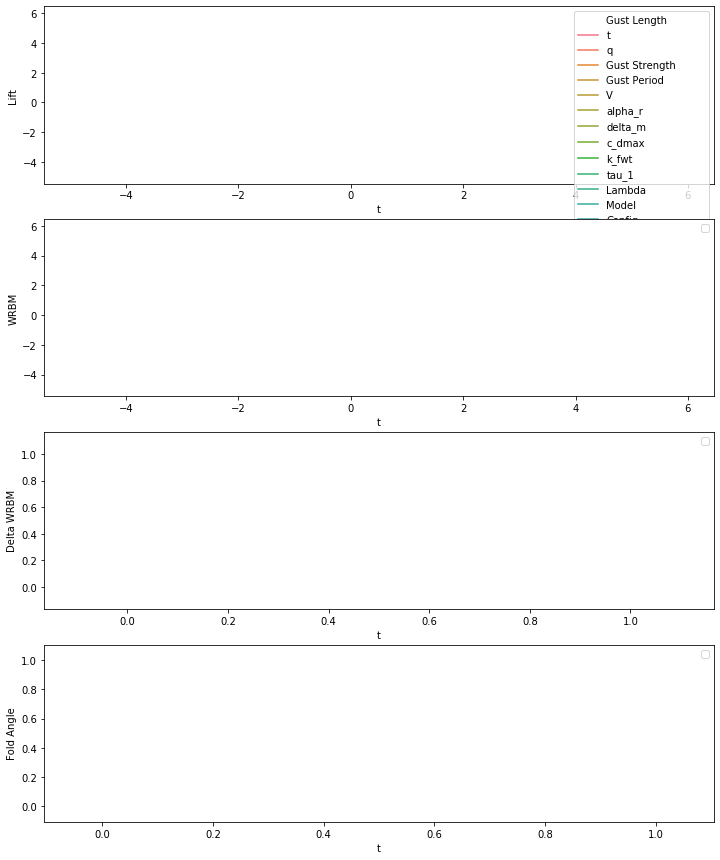

In [17]:
data = gust_df.copy()
data = data[data['Gust Strength']==1]
data['Locked'] = data['k_fwt']>0
data['Gust Period'] = pd.Categorical(data['Gust Period'])
data['Gust Length'] = pd.Categorical(data.apply(lambda row: row['V']*row['Gust Period'],1))

fig, axes = plt.subplots(4,1,figsize=(12,15))

sns.lineplot(data = data, x = 't',y='Lift',hue = 'Gust Length',style = 'Locked',ax = axes[0])
sns.lineplot(data = data, x = 't',y='WRBM',hue = 'Gust Length',style = 'Locked',ax = axes[1])
sns.lineplot(data = data, x = 't',y='Delta WRBM',hue = 'Gust Period',style = 'Locked',ax = axes[2])
sns.lineplot(data = data[data['Locked']==False], x = 't',y='Fold Angle',hue = 'Gust Period',ax = axes[3])

axes[1].legend([])
axes[2].legend([])
axes[3].legend([])


0      -2.798206
1      -2.798141
2      -2.797353
3      -2.792938
4      -2.778625
          ...   
2401   -0.001174
2402   -0.001174
2403   -0.001192
2404   -0.001201
2405   -0.001216
Name: Fold Angle, Length: 2406, dtype: float64


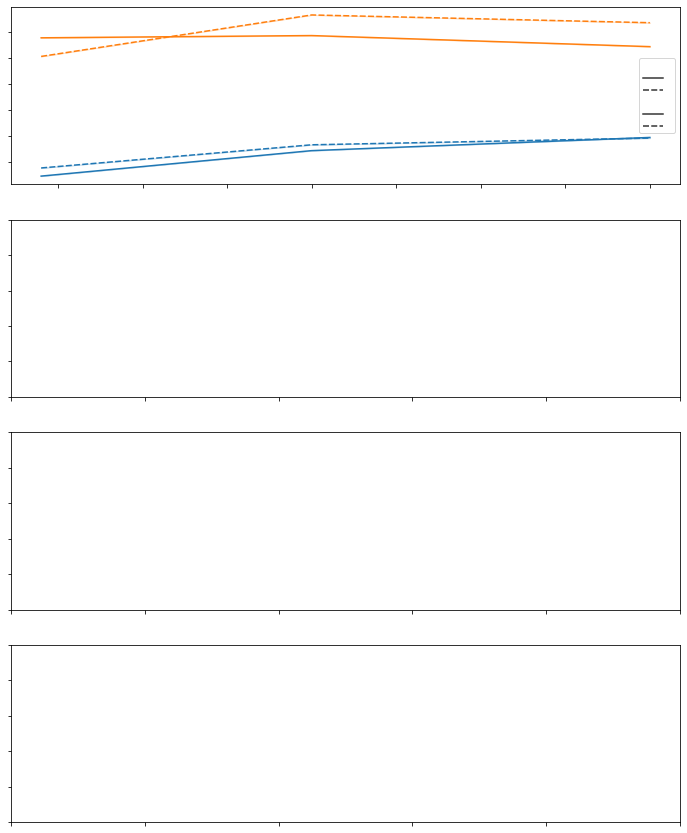

In [50]:
data = gust_df.copy()
data = data[data['Gust Strength']==1]
data['Locked'] = data['k_fwt']>0
print(data['Fold Angle'])

fig, axes = plt.subplots(4,1,figsize=(12,15))

sns.lineplot(data = data, x='Gust Period',y='WRBM Min',style = 'Locked',ax=axes[0])
sns.lineplot(data = data, x='Gust Period',y='WRBM Max',style = 'Locked',ax=axes[0])
#sns.lineplot(data = data, x = 't',y='Lift',hue = 'Gust Period',style = 'Locked',ax = axes[0])
#sns.lineplot(data = data, x = 't',y='WRBM',hue = 'Gust Period',style = 'Locked',ax = axes[1])
#sns.lineplot(data = data, x = 't',y='Delta WRBM',hue = 'Gust Period',style = 'Locked',ax = axes[2])
#sns.lineplot(data = data, x = 't',y='Fold Angle',hue = 'Gust Period',style = 'Locked',ax = axes[3])

#axes[1].legend([])
#axes[2].legend([])
#axes[3].legend([])